## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 이름과 다르게 **분류(Classification)** 알고리즘이다.
- 로지스틱 회귀는 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 샘플 만들기

Text(0.5,1,'make_blobs() - 400 samples')

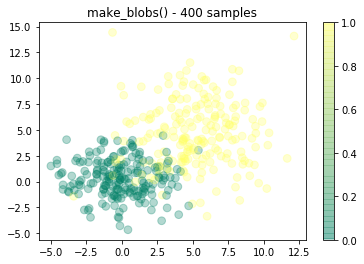

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(400, 2, [[0,0],[5,5]], [2,3])

plt.scatter(X[:,0], X[:,1], c=y, s=60, alpha=0.3, cmap='summer')
plt.colorbar()
plt.title('make_blobs() - 400 samples')

In [3]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a

In [4]:
np.bincount(y)

array([200, 200], dtype=int64)

In [7]:
X[y==1].mean(axis=0)

array([5.16276464, 4.62630192])

### 로지스틱 회귀 적용해 보기

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
print(score)

0.9275


In [9]:
display(model.coef_, model.intercept_)

array([[0.79394875, 0.62054615]])

array([-2.97602049])

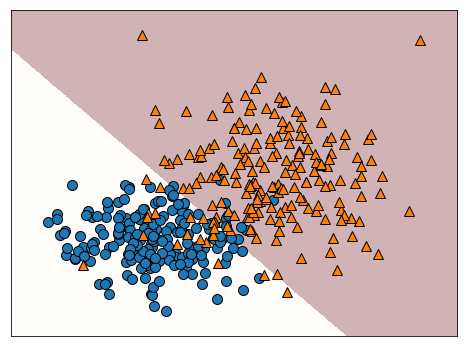

In [10]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 시그모이드 함수

- 로지스틱회귀는 아래와 같은 시그모이드 함수를 적용하는 알고리즘이다.
- $ sigmoid(t) = \frac{1}{1+e^{-t}} $

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

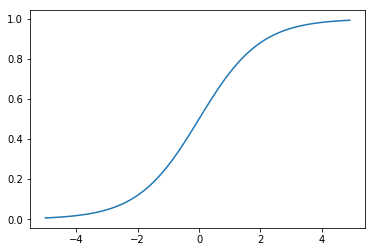

In [13]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))

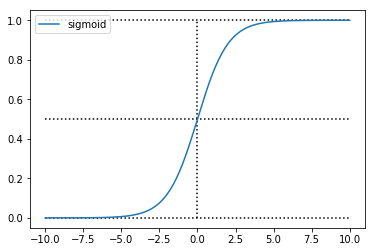

In [15]:
rng = np.arange(-10, 10.01, 0.1)
plt.hlines([0, 0.5, 1], -10, 10, linestyles=':')
plt.vlines([0], 0, 1, linestyles=':')
plt.plot(rng, sigmoid(rng), label='sigmoid')
plt.legend()

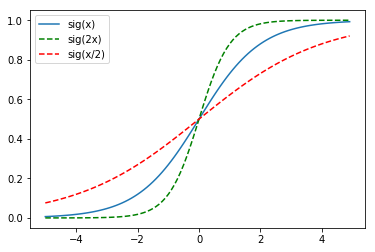

In [18]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))
plt.plot(rng, sigmoid(2*rng), 'g--')
plt.plot(rng, sigmoid(0.5*rng), 'r--')
plt.legend(['sig(x)', 'sig(2x)', 'sig(x/2)'])

Text(0.5,0,'target')

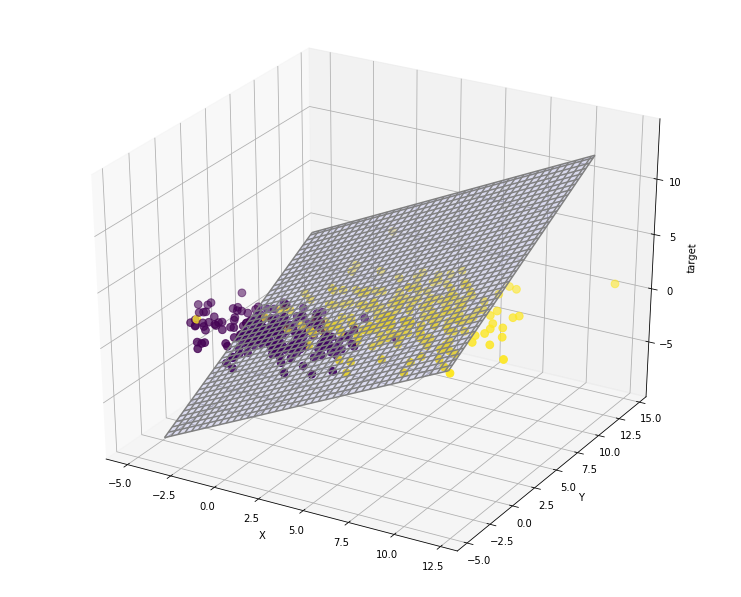

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

#ax.view_init(60, 70)

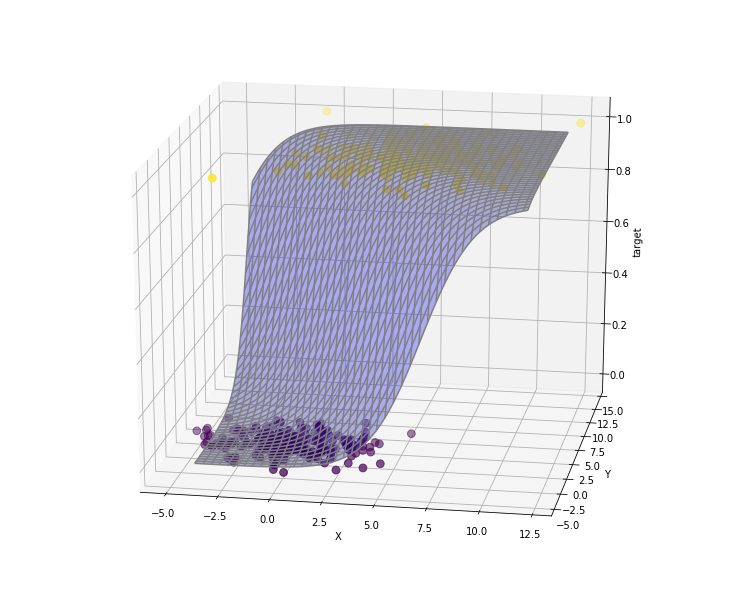

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)

### predict_proba() 함수
- 각 클래스에 속할 확률은 model.predict_proba() 함수로 알 수 있다.
- 각 행의 합은 1(100%)가 된다.

In [27]:
pred_y = model.predict(X)
display(np.round(model.predict_proba(X)[:10],2), pred_y[:10], y[:10])

array([[0.  , 1.  ],
       [0.85, 0.15],
       [0.09, 0.91],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.32, 0.68],
       [0.8 , 0.2 ],
       [0.96, 0.04]])

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

- 각 샘플의 확률(sigmoid 적용값) 계산

In [32]:
n = 2
p1 = sigmoid(model.coef_[0,0]*X[n,0] + model.coef_[0,1]*X[n,1] + model.intercept_[0])
p0 = 1-p1
p0, p1

(0.09352207771520527, 0.9064779222847947)

- decision_function() : 각 샘플의 평면까지의 거리

In [33]:
model.decision_function(X)[:10]

array([ 8.2050377 , -1.77088187,  2.27136914, -2.73365428, -4.05632637,
       -2.94122841,  7.72970751,  0.73958891, -1.38247307, -3.17323246])

In [36]:
n=0
model.coef_[0,0]*X[n,0] + model.coef_[0,1]*X[n,1] + model.intercept_[0]

8.205037701210253

### 클래스가 3개인 경우

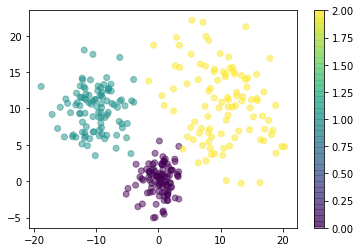

In [37]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, [[0,0],[-10,10],[10,10]], [2,3,5])

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar()

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
score

0.9933333333333333

In [39]:
display(model.coef_, model.intercept_)

array([[-0.10391252, -1.03436797],
       [-0.81542958,  0.15775019],
       [ 0.73843808,  0.4026871 ]])

array([ 3.25982219, -3.7612062 , -3.98244396])

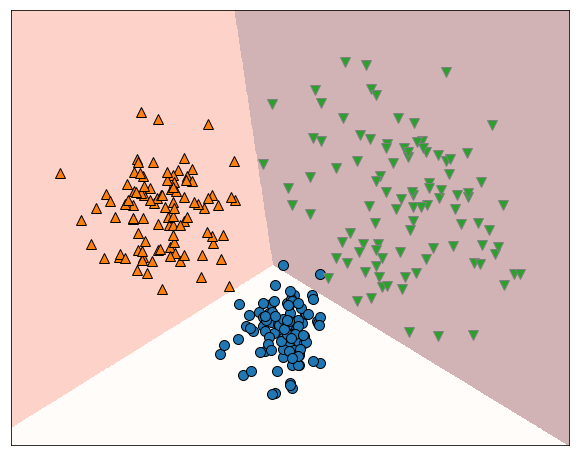

In [40]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 일대다 분류
- 한 클래스와 나머지 클래스 간의 경계선을 그린다
- 이렇게 나온 경계선들을 통합하여 판정을 내린다

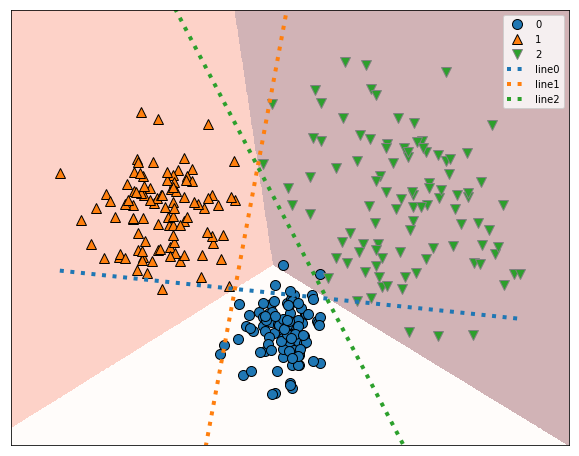

In [41]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4, label='line'+str(i))
plt.legend()

In [43]:
pred_y = model.predict(X)
display(np.round(model.predict_proba(X)[:10],2), pred_y[:10], y[:10])

array([[0.16, 0.  , 0.83],
       [0.05, 0.95, 0.  ],
       [0.98, 0.01, 0.01],
       [0.  , 0.  , 1.  ],
       [0.95, 0.03, 0.02],
       [0.95, 0.02, 0.03],
       [0.96, 0.02, 0.03],
       [0.  , 0.97, 0.02],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ]])

array([2, 1, 0, 2, 0, 0, 0, 1, 1, 2])

array([0, 1, 0, 2, 0, 0, 0, 1, 1, 2])

In [44]:
model.decision_function(X)[:10]

array([[ -2.02781376,  -5.69679317,   0.37839795],
       [ -3.0060008 ,   5.06300054,  -8.15001608],
       [  5.35385557,  -4.22099004,  -4.6797581 ],
       [-15.35779857,  -5.30156495,   6.94296863],
       [  2.46095983,  -3.37538885,  -3.89309569],
       [  2.75640079,  -3.8284258 ,  -3.66555182],
       [  2.91838106,  -4.01456428,  -3.59306255],
       [ -6.91147032,   2.24616023,  -3.7643075 ],
       [ -6.56010011,   3.19695437,  -4.74442996],
       [-13.24756984, -11.48923708,  11.04671293]])

### 확률 계산

In [51]:
help(model.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [48]:
result = sigmoid(X@(w.T)+b)
result.shape

(300, 3)

In [50]:
result[:10]

array([[1.16313445e-01, 3.34548280e-03, 5.93486650e-01],
       [4.71555120e-02, 9.93713226e-01, 2.88647376e-04],
       [9.95292387e-01, 1.44715971e-02, 9.19590917e-03],
       [2.13891110e-07, 4.95907344e-03, 9.99035532e-01],
       [9.21359237e-01, 3.30735410e-02, 1.99750176e-02],
       [9.40273826e-01, 2.12810857e-02, 2.49515353e-02],
       [9.48747634e-01, 1.77307632e-02, 2.67771925e-02],
       [9.95300240e-04, 9.04318810e-01, 2.26583578e-02],
       [1.41374247e-03, 9.60719504e-01, 8.62498245e-03],
       [1.76462632e-06, 1.02396070e-05, 9.99984061e-01]])

In [52]:
prob = result/((result.sum(axis=1)).reshape(-1,1))
prob

array([[1.63099161e-01, 4.69116392e-03, 8.32209676e-01],
       [4.52914349e-02, 9.54431328e-01, 2.77237025e-04],
       [9.76772877e-01, 1.42023226e-02, 9.02479992e-03],
       [2.13040053e-07, 4.93934166e-03, 9.95060445e-01],
       [9.45558155e-01, 3.39421966e-02, 2.04996488e-02],
       [9.53135004e-01, 2.15721709e-02, 2.52928253e-02],
       [9.55189826e-01, 1.78511588e-02, 2.69590152e-02],
       [1.07255363e-03, 9.74510388e-01, 2.44170582e-02],
       [1.45632808e-03, 9.89658882e-01, 8.88478943e-03],
       [1.76463327e-06, 1.02396473e-05, 9.99987996e-01],
       [5.25698038e-03, 2.26169144e-08, 9.94742997e-01],
       [9.66395927e-01, 1.13905828e-02, 2.22134905e-02],
       [6.14635575e-04, 9.99200401e-01, 1.84963540e-04],
       [9.72415788e-01, 1.60745983e-02, 1.15096140e-02],
       [7.01730126e-05, 9.93822227e-01, 6.10760045e-03],
       [8.53476651e-01, 5.91569244e-03, 1.40607657e-01],
       [1.64824649e-01, 3.34300819e-05, 8.35141921e-01],
       [1.49344395e-04, 9.97721

### 소프트맥스 함수 적용
- multi_class : str, {'ovr', 'multinomial'}, default: 'ovr'
- multi_class 옵션이 'ovr' 이면 일대다(one-vs.-rest) 이고, 'multinomial' 이면 소프트맥스 함수를 적용한다
> $ softmax(n) = exp(p_n) / \sum_i exp(p_i) $ <br>
> $ p_i = \sum_j (w_j*x_j) + b $

In [53]:
result = X@(w.T)+b
result.shape

(300, 3)

In [56]:
prob = np.exp(result)/((np.exp(result).sum(axis=1)).reshape(-1,1))
np.round(prob[:10], 2)

array([[0.08, 0.  , 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

### 중요옵션 C!

- 로지스틱회귀의 중요 옵션은 C 이다.
- C 값이 커질수록 학습데이터에 최대한 맞추려고 한다. 즉 과대적합된다.

0.9833333333333333


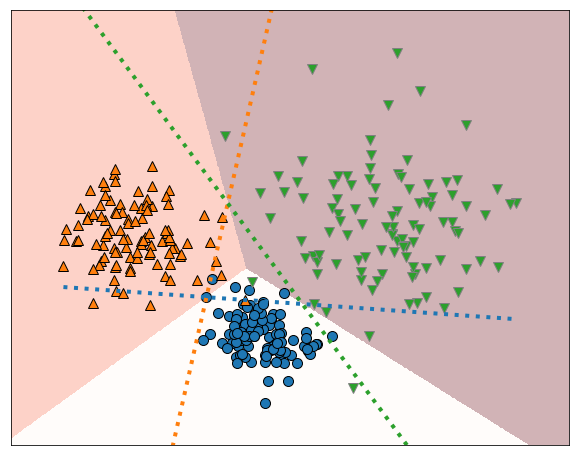

In [51]:
model = LogisticRegression(C=1000)
model.fit(X, y)
score = model.score(X, y)
print(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

- 비용함수에 $ \frac{1}{C} \cdot \sum_i w_i^2 $ 항을 추가함
> C 의 역수는 $ \alpha $ 임 ($ \alpha \cdot \sum_i w_i^2 $)<br>
> penalty='l1' 인 경우 $ \frac{1}{C} \cdot \sum_i |w_i| $ 항이 추가됨

In [58]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

### Iris 데이터 - 속성 2개로 제한

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

col1 = 1
col2 = 3

X = iris.data[:, [col1,col2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

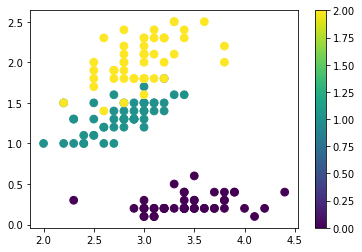

In [15]:
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X, y)
score = model.score(X, y)
score

0.9466666666666667

In [17]:
display(model.coef_, model.intercept_)

array([[ 1.17857118, -4.20397905],
       [-1.06767017,  0.30439343],
       [-1.72595521,  3.95376877]])

array([-0.36473596,  2.07538234, -1.53014082])

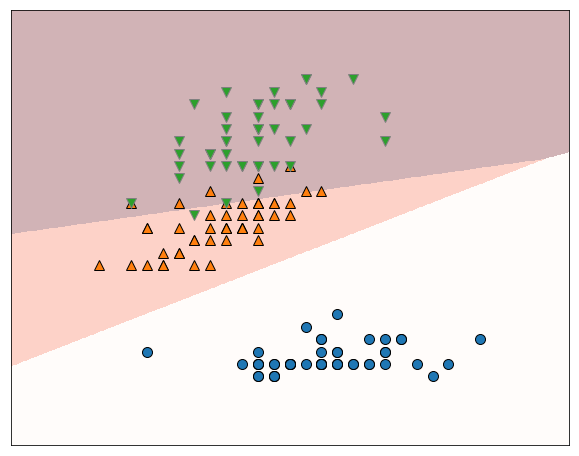

In [18]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

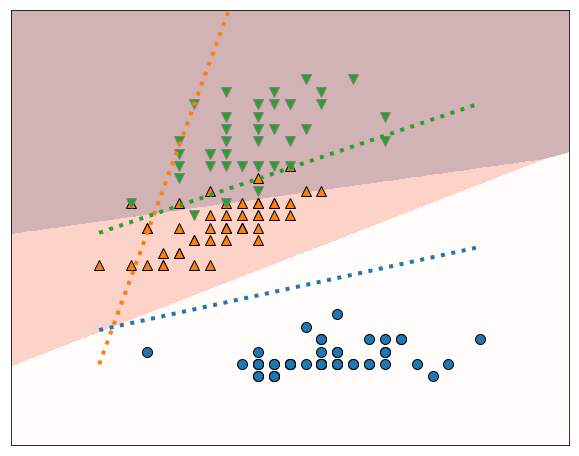

In [19]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(model.coef_[i,0]*rng + model.intercept_[i])/model.coef_[i,1], ':', lw=4)

### Iris 데이터 - 모든 속성 사용

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

0.9642857142857143 0.9473684210526315


In [22]:
display(model.coef_, model.intercept_)

array([[ 0.42258361,  1.32597849, -2.16247393, -0.99107654],
       [ 0.32711721, -1.3732625 ,  0.52277676, -0.99198918],
       [-1.6421272 , -1.30000951,  2.32818782,  2.19900624]])

array([ 0.25293147,  0.83126078, -1.03436611])

### 옵션(C) 변경 및 과적합 판단

Text(0,0.5,'score')

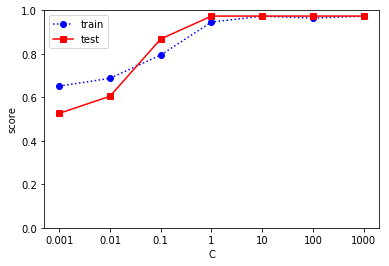

In [38]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

s1 = []
s2 = []

for c in Cs:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    s1.append(score_train)
    s2.append(score_test)
    
plt.plot(s1,'bo:')
plt.plot(s2,'rs-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)),Cs)
plt.ylim(0,1)
plt.xlabel('C')
plt.ylabel('score')

### 시그모이드(sigmoid) 함수 적용

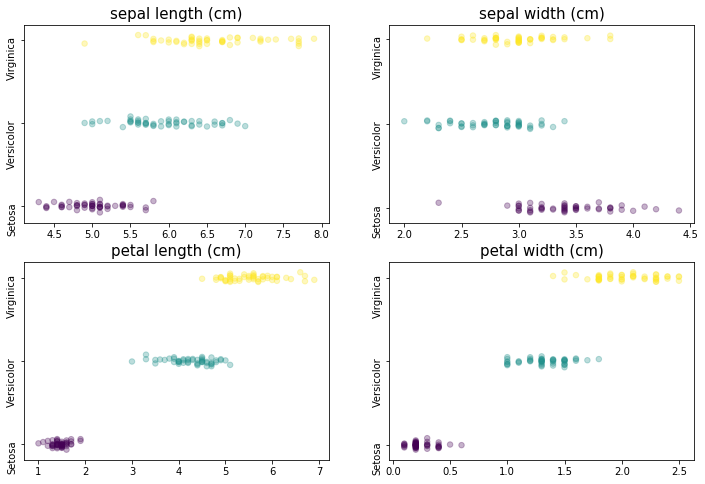

In [39]:
plt.figure(figsize=[12,8])

for col in range(4):
    plt.subplot(2,2,col+1)
    plt.scatter(iris.data[:,col], iris.target + np.random.normal(0,0.03,size=len(y)), c=iris.target, s=30, alpha=0.3)
    plt.yticks([0,1,2], ['Setosa', 'Versicolor', 'Virginica'], rotation=90)
    plt.title(iris.feature_names[col], fontsize=15)

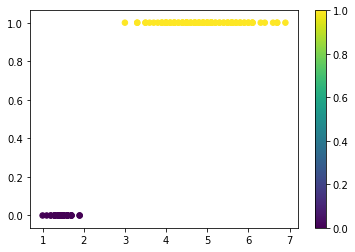

In [3]:
X = iris.data[:,[2]]
y = iris.target.copy()
y[y==2]=1

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

In [7]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5,1,'Sigmoid')

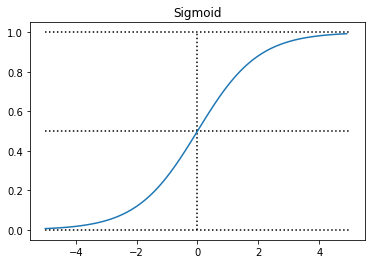

In [42]:
rng = np.arange(-5,5,0.1)
plt.plot(rng, sigmoid(rng))

plt.hlines([0,0.5,1],-5,5,linestyles='dotted')
plt.vlines([0],0,1,linestyles='dotted')
plt.title('Sigmoid')

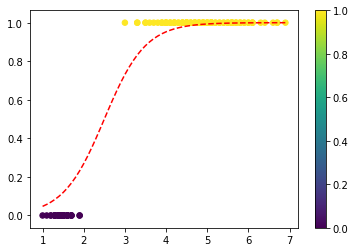

In [43]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(2*(rng-2.5)), 'r--')

In [5]:
from sklearn.linear_model import LogisticRegression

C = 1000
model = LogisticRegression(C=C)
model.fit(X, y)

display(model.score(X, y), model.coef_, model.intercept_)

1.0

array([[7.51514002]])

array([-18.8436414])

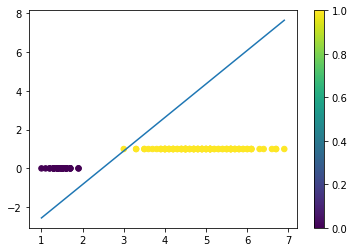

In [79]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)

In [80]:
경계값 = -model.intercept_/model.coef_
경계값

array([[2.47845384]])

Text(0.5,1,'LogisticRegression (C=1000.000000)')

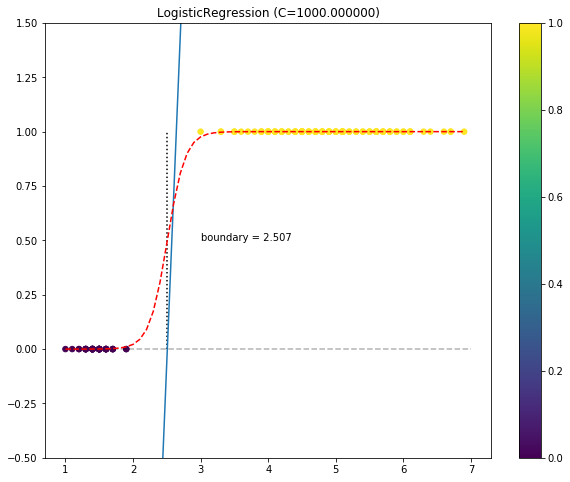

In [8]:
plt.figure(figsize=[10,8])

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)
plt.plot(rng, sigmoid(model.coef_[0,0]*rng+model.intercept_[0]), 'r--')
plt.vlines([-model.intercept_[0]/model.coef_[0,0]],0,1,linestyles='dotted')
plt.hlines([0],1,7,linestyles='dashed', alpha=0.3)
plt.text(3, 0.5, 'boundary = %.3f' % (-model.intercept_[0]/model.coef_[0,0]))
plt.ylim(-0.5, 1.5)
plt.title('LogisticRegression (C=%f)' % C)

### 관련 기술
- 공식
$$ sigmoid(t) = \frac{1}{1 + e^{-t}} $$
<br>
$$ t = w \cdot x + b $$
<br>
$$ sigmoid(t) = \frac{1}{1 + e^{-(w \cdot x + b)}} $$
<br>
$$ t = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + b $$
- 소프트맥스(softmax) 함수
- 크로스 엔트로피 (cross entropy)

### 크로스 엔트로피
- 로지스틱 회귀의 비용함수로 사용함

#### 클래스가 2개인 경우
- cross_entropy = (-y * np.log(pred_y) - (1-y) * np.log(1-pred_y)).sum()

#### 클래스가 3개 이상인 경우
- cross_entropy = (-y * np.log(pred_y)).sum()
- 여기서 pred_y  는 소프트맥스 함수를 적용한 결과임
- 그리고, y 는 [1,0,0], [0,1,0], [0,0,1] 과 같이 원핫인코딩이어야 함